### Importing the dataset and libraries:

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("pastel")
plt.rcParams.update({'font.size': 20})

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [3]:
# To load a dataset for training
train = pd.read_csv("train.csv")
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
# load data for testing
test = pd.read_csv("test.csv")
test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


### Conducting Exploratory Data Analysis (EDA):

In [5]:
# Getting information about a DataFrame:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
# # Obtain a statistical summary of the DataFrame
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


### Performing Data Visualization

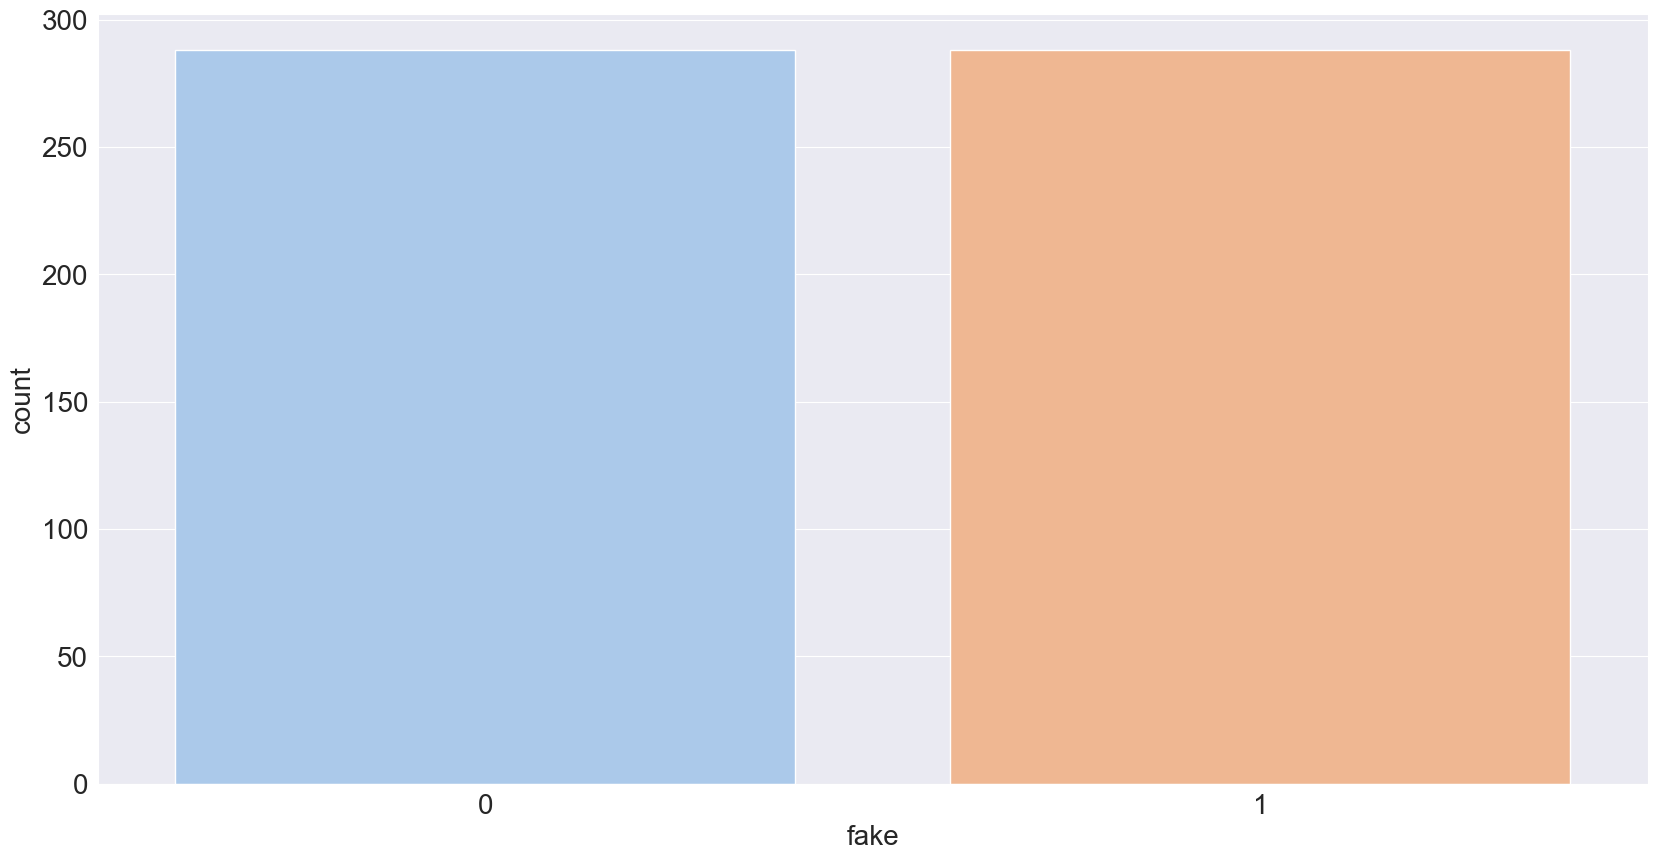

In [7]:
# Histogram for Numerical Features:
plt.figure(figsize=(20,10))
sns.countplot(train["fake"])
plt.show("png")

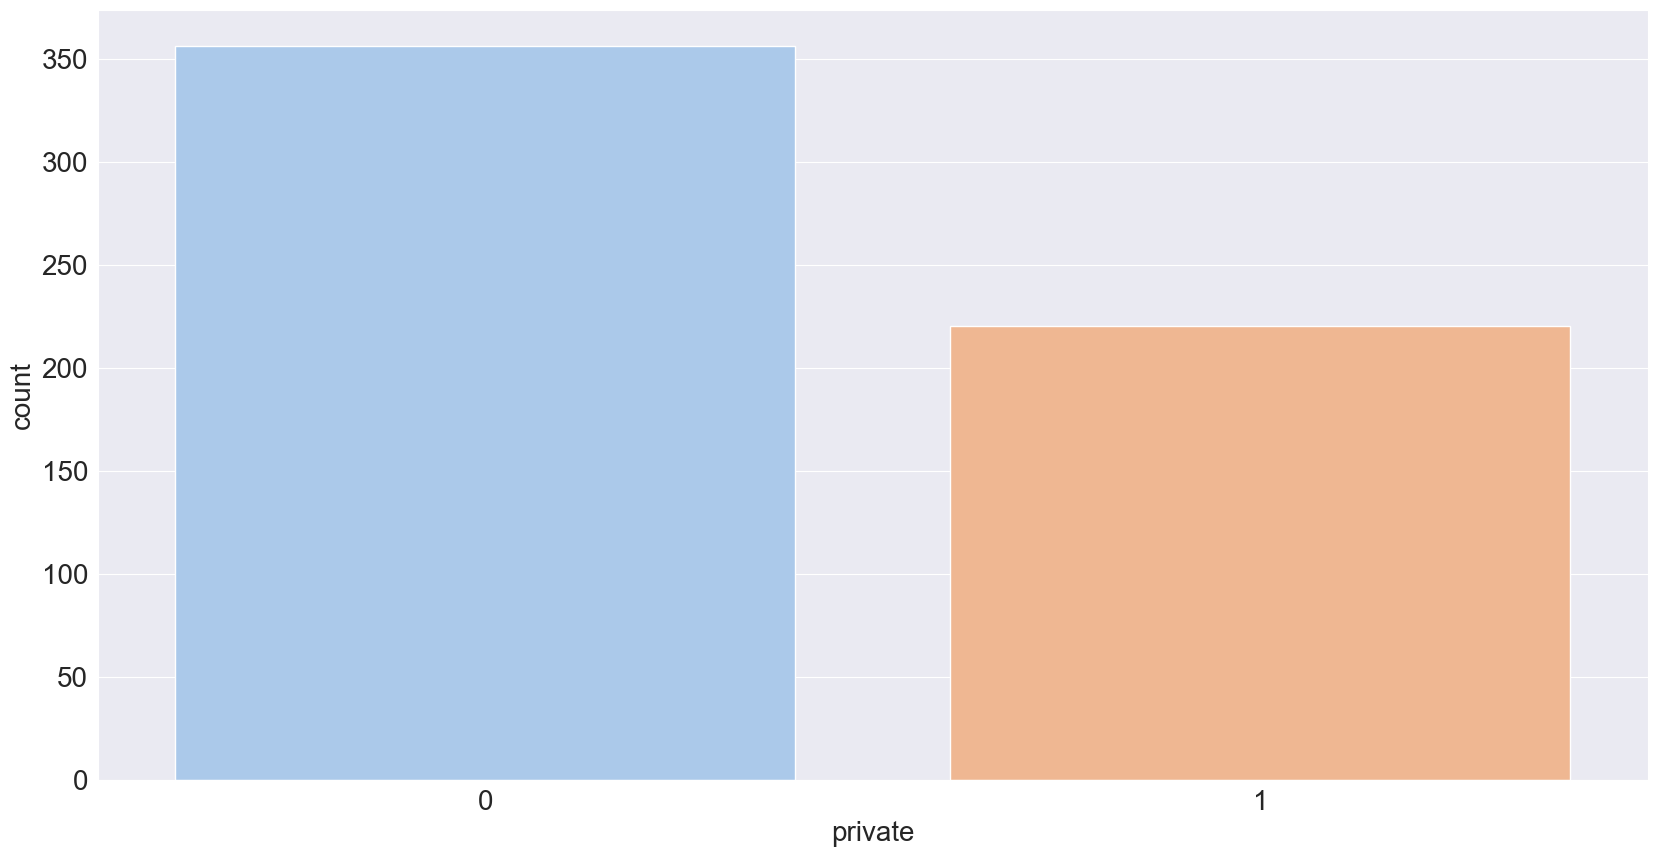

In [8]:
# To visualize the data in the "private" column
plt.figure(figsize=(20,10))
sns.countplot(train["private"])
plt.show("png")

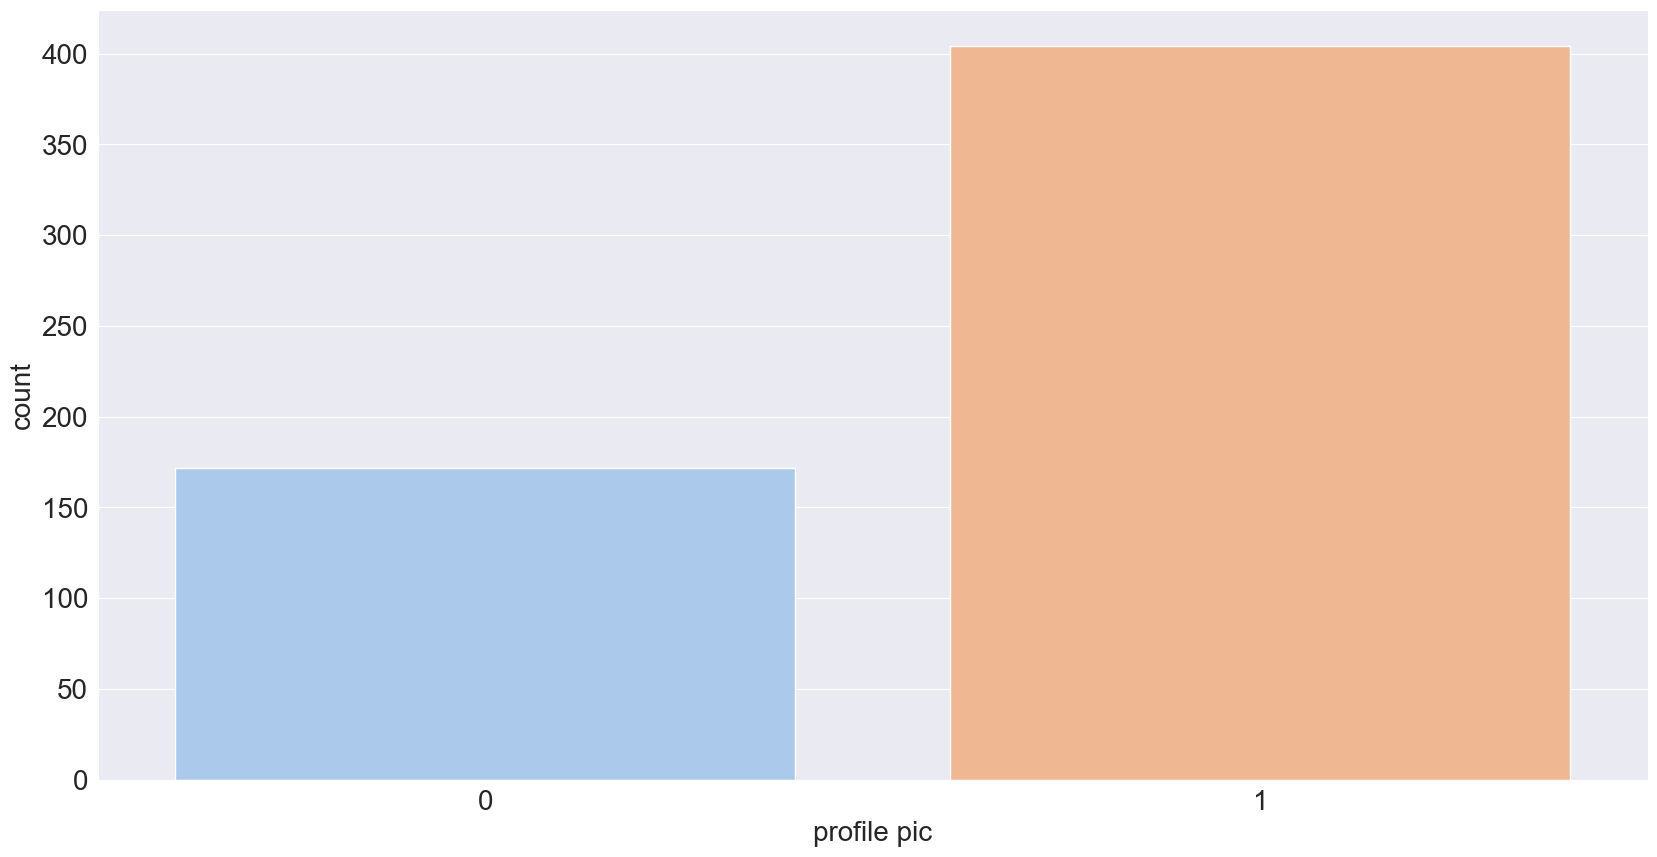

In [9]:
# To visualize the data in  "profile pic"
plt.figure(figsize=(20,10))
sns.countplot(train["profile pic"])
plt.show("png")

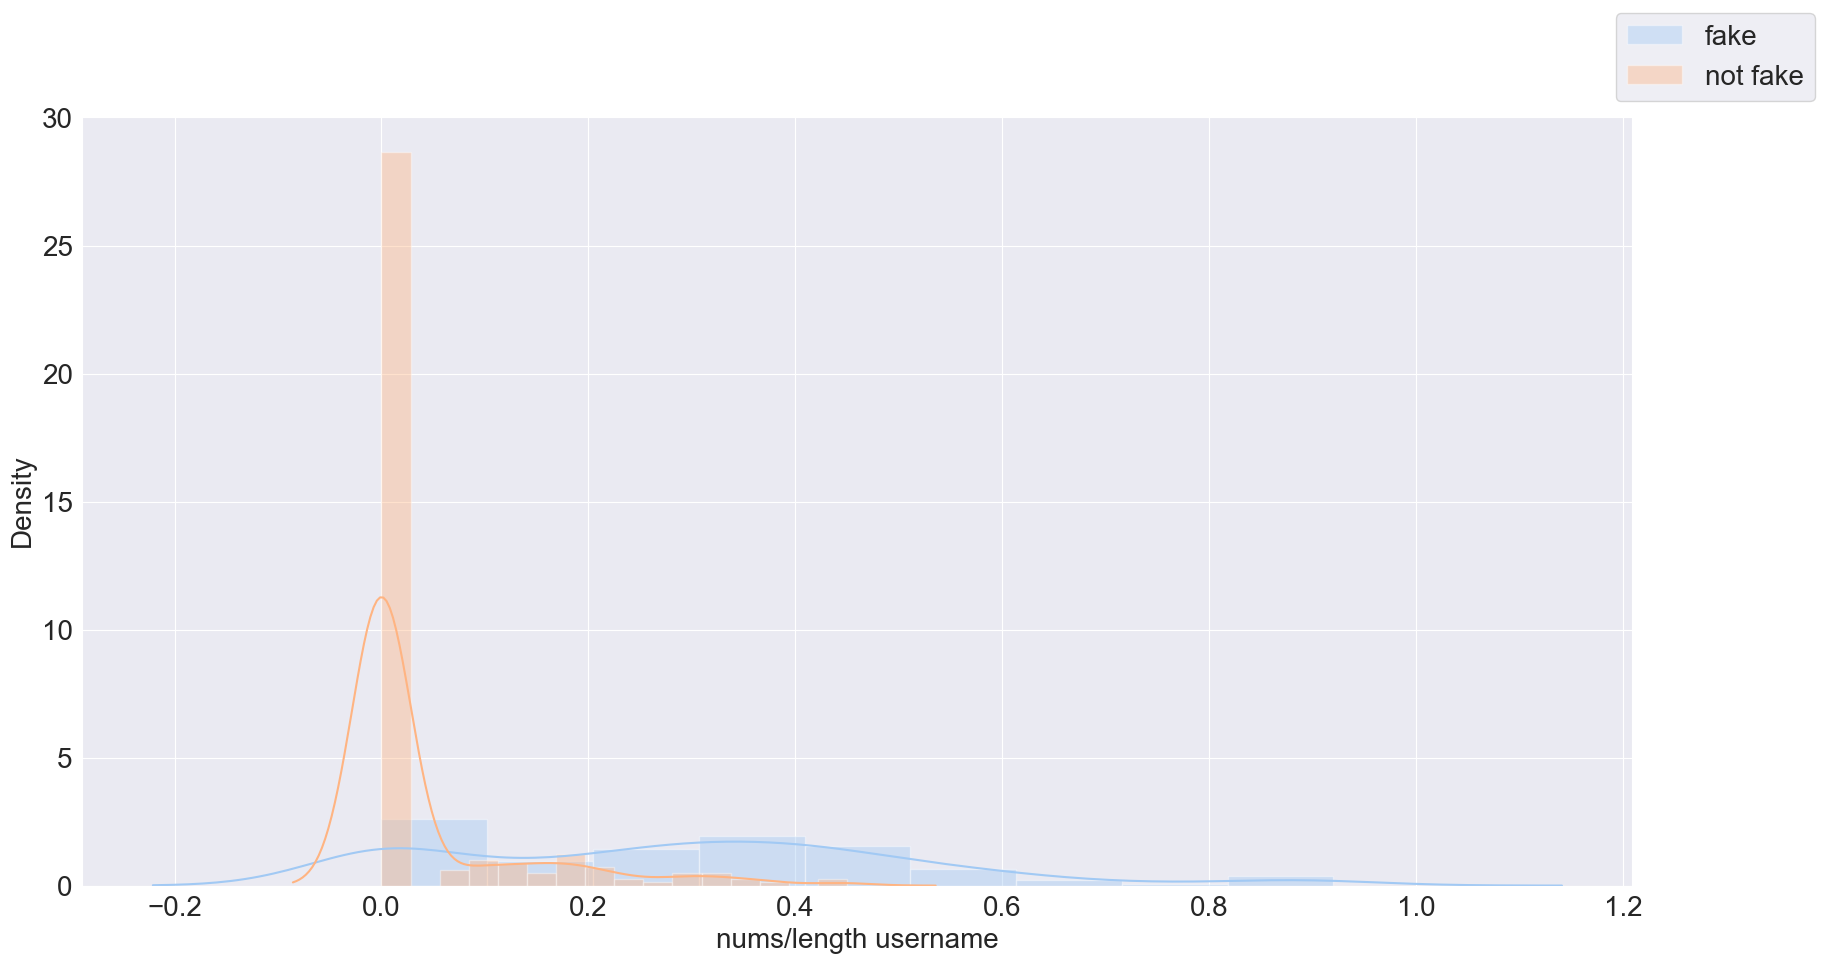

In [10]:
# Data visualization
fake = train[train["fake"] == 1]
not_fake = train[train["fake"] == 0]
fig = plt.figure(figsize = (20, 10))
sns.distplot(fake["nums/length username"], label = "fake")
sns.distplot(not_fake["nums/length username"], label = "not fake")
fig.legend()
plt.show("png")

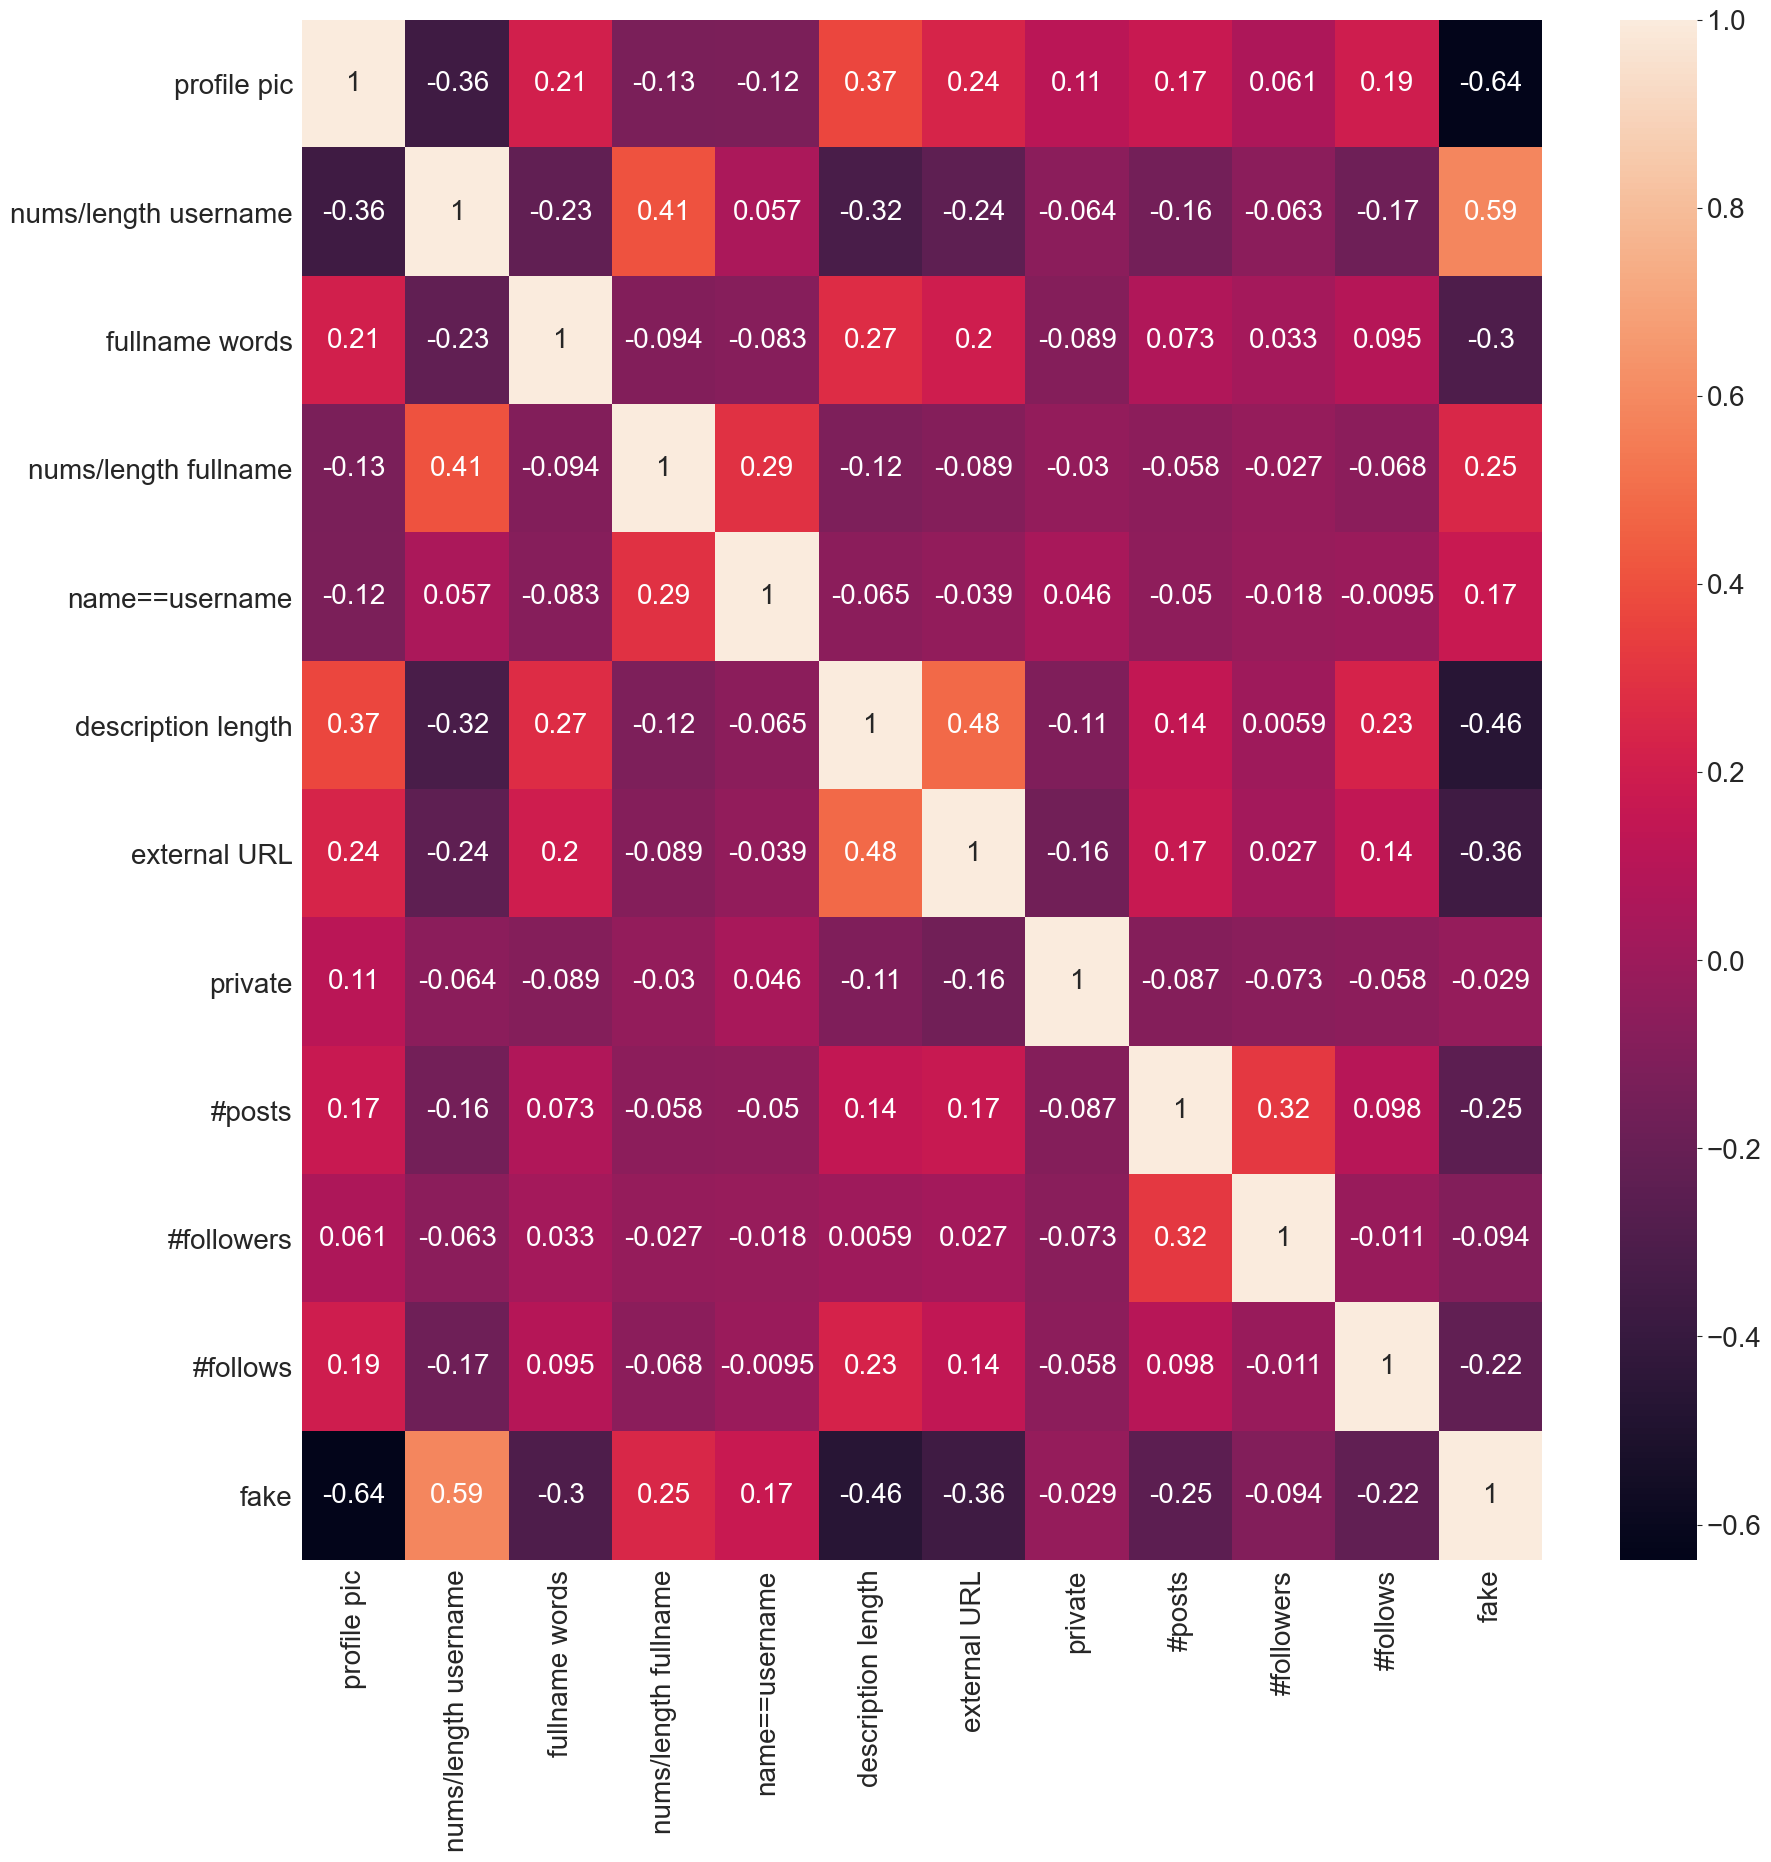

In [11]:
# Correlation graph
plt.figure(figsize=(20, 20))
cm = train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show("png")

### Data preparation for modeling

In [12]:
# Training Dataset (Input Data and Output Data):
X_train = train.drop(columns = ['fake'])
X_test = test.drop(columns = ['fake'])

# Testing Dataset (Input Data):
y_train = train['fake']
y_test = test['fake']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 11), (576,), (120, 11), (120,))

In [13]:
# Scaling data before training a model
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

### Building and training a simple deep learning model

In [15]:
model = Sequential()
model.add(Dense(50, input_dim = 11, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 25)                3775      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 52        
                                                                 
Total params: 12,077
Trainable params: 12,077
Non-traina

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 1s 17ms/step - loss: 0.5997 - accuracy: 0.7278 - val_loss: 0.5837 - val_accuracy: 0.7759
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8803 - val_loss: 0.3034 - val_accuracy: 0.8966
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8842 - val_loss: 0.2222 - val_accuracy: 0.9138
Epoch 4/20
17/17 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.9112 - val_loss: 0.2104 - val_accuracy: 0.9138
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2587 - accuracy: 0.8996 - val_loss: 0.1902 - val_accuracy: 0.9138
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2449 - accuracy: 0.9151 - val_loss: 0.1626 - val_accuracy: 0.9138
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.9170 - val_loss: 0.1764 - val_accuracy: 0.8966
Epoch 8/20
17/17 [=

### Evaluating a trained model

In [18]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


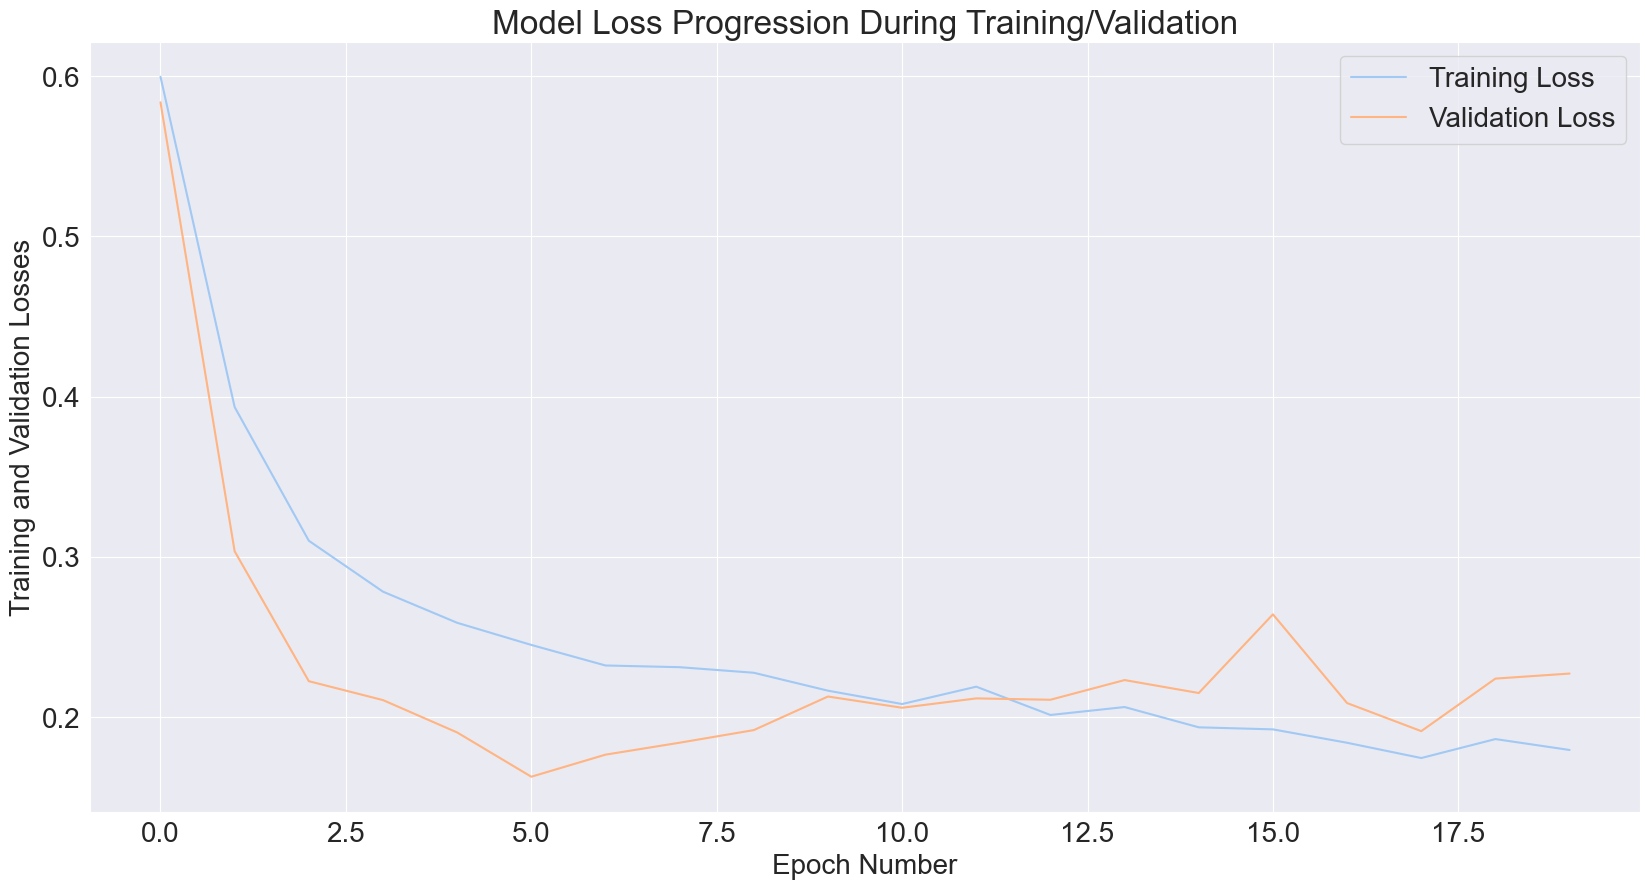

In [19]:
plt.figure(figsize=(20,10))
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show("png")

In [20]:
predicted = model.predict(X_test)

In [21]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [22]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.93      0.87      0.90        60

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



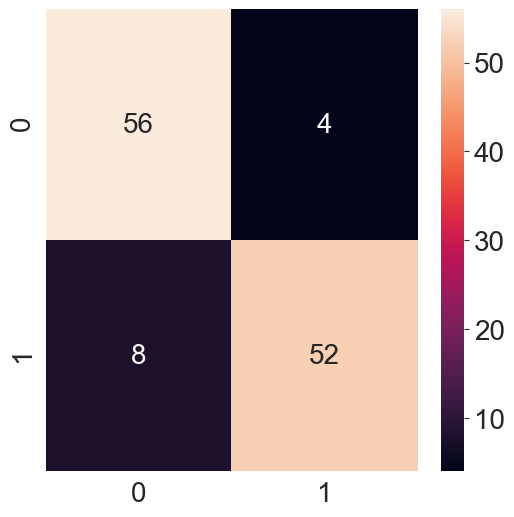

In [23]:
plt.figure(figsize=(6, 6))
cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show("png")